# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer


import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/

from nltk.corpus import stopwords
import pickle

from tqdm import tqdm
import os

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# from plotly import plotly
# import plotly.offline as offline
# import plotly.graph_objs as go
#offline.init_notebook_mode()
from collections import Counter

## 1. Reading Data

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_data = pd.read_csv('drive/My Drive/Stuff/DonorsChooseData/train_data.csv')

resource_data = pd.read_csv('drive/My Drive/Stuff/DonorsChooseData//resources.csv')

In [224]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [225]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


# Data Analysis

Number of projects thar are approved for funding  92706 , ( 84.85830404217927 %)
Number of projects thar are not approved for funding  16542 , ( 15.141695957820739 %)


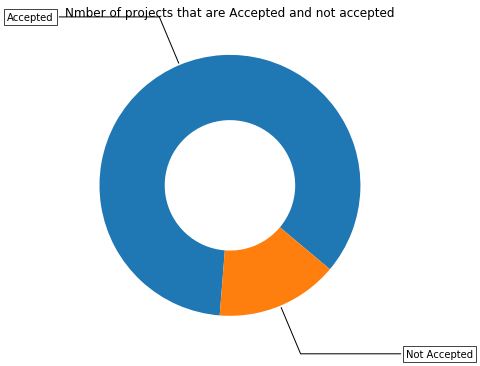

In [226]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = project_data['project_is_approved'].value_counts()
print("Number of projects thar are approved for funding ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("Number of projects thar are not approved for funding ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Accepted", "Not Accepted"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Nmber of projects that are Accepted and not accepted")

plt.show()

# 1.2.1 Univariate Analysis: School State

In [0]:
# Pandas dataframe grouby count, mean: https://stackoverflow.com/a/19385591/4084039

temp = pd.DataFrame(project_data.groupby("school_state")["project_is_approved"].apply(np.mean)).reset_index()
# if you have data which contain only 0 and 1, then the mean = percentage (think about it)
temp.columns = ['state_code', 'num_proposals']

# How to plot US state heatmap: https://datascience.stackexchange.com/a/9620

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = temp['state_code'],
        z = temp['num_proposals'].astype(float),
        locationmode = 'USA-states',
        text = temp['state_code'],
        marker = dict(line = dict (color = 'rgb(255,255,255)',width = 2)),
        colorbar = dict(title = "% of pro")
    ) ]

layout = dict(
        title = 'Project Proposals % of Acceptance Rate by US States',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

# fig = go.Figure(data=data, layout=layout)
# offline.iplot(fig, filename='us-map-heat-map')

In [228]:
# https://www.csi.cuny.edu/sites/default/files/pdf/administration/ops/2letterstabbrev.pdf
temp.sort_values(by=['num_proposals'], inplace=True)
print("States with lowest % approvals")
print(temp.head(5))
print('='*50)
print("States with highest % approvals")
print(temp.tail(5))

States with lowest % approvals
   state_code  num_proposals
46         VT       0.800000
7          DC       0.802326
43         TX       0.813142
26         MT       0.816327
18         LA       0.831245
States with highest % approvals
   state_code  num_proposals
30         NH       0.873563
35         OH       0.875152
47         WA       0.876178
28         ND       0.888112
8          DE       0.897959


In [0]:
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [0]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'total':'count'})).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg({'Avg':'mean'})).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))
    print("="*50)
    print(temp.tail(5))

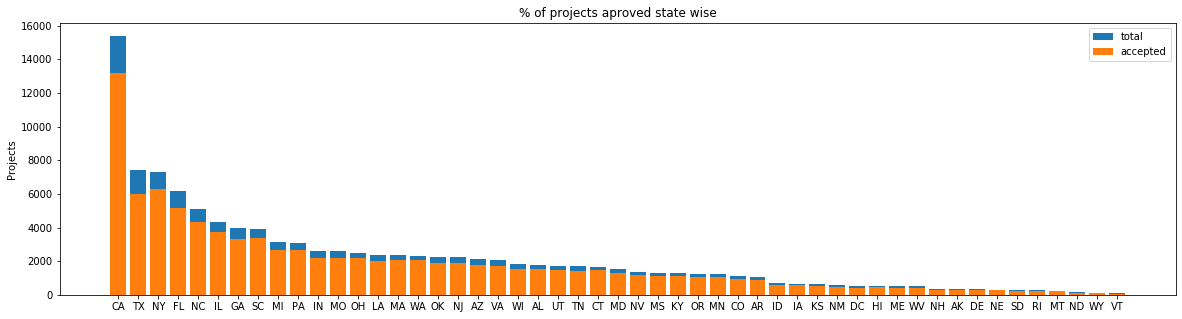

   school_state  project_is_approved  total       Avg
4            CA                13205  15388  0.858136
43           TX                 6014   7396  0.813142
34           NY                 6291   7318  0.859661
9            FL                 5144   6185  0.831690
27           NC                 4353   5091  0.855038
   school_state  project_is_approved  total       Avg
39           RI                  243    285  0.852632
26           MT                  200    245  0.816327
28           ND                  127    143  0.888112
50           WY                   82     98  0.836735
46           VT                   64     80  0.800000


In [231]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

__Every state is having more than 80% success rate in approval__

### Univariate Analysis: teacher_prefix

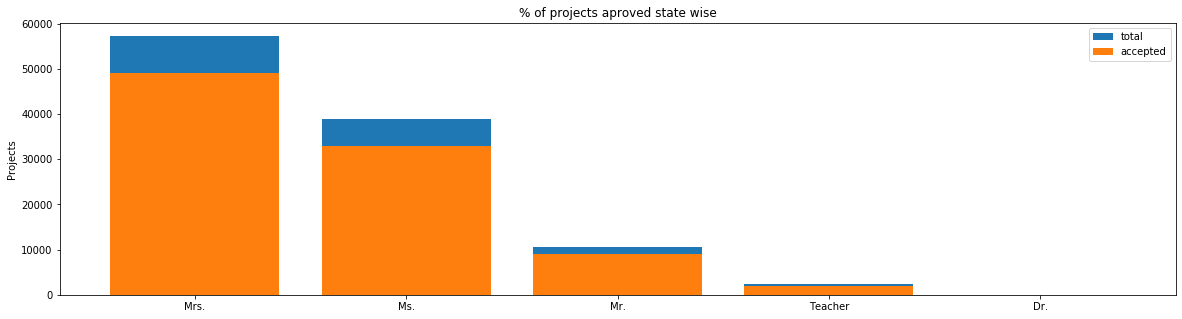

  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308
  teacher_prefix  project_is_approved  total       Avg
2           Mrs.                48997  57269  0.855559
3            Ms.                32860  38955  0.843537
1            Mr.                 8960  10648  0.841473
4        Teacher                 1877   2360  0.795339
0            Dr.                    9     13  0.692308


In [232]:
univariate_barplots(project_data, 'teacher_prefix', 'project_is_approved' , top=False)

### Univariate Analysis: project_grade_category

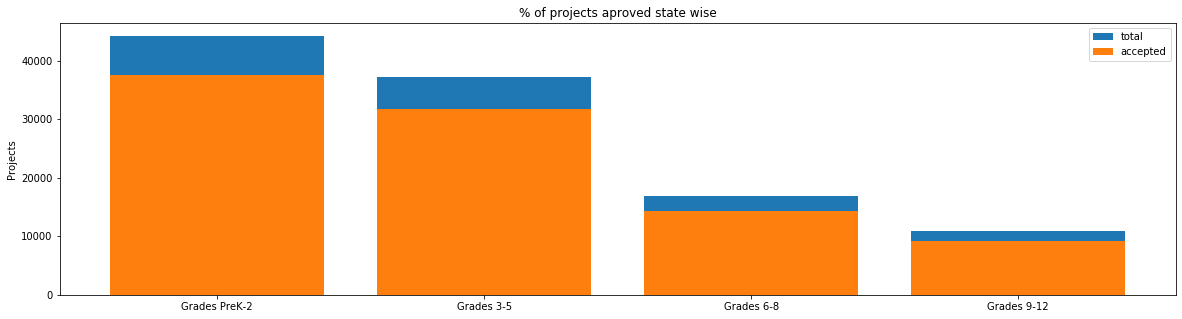

  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636
  project_grade_category  project_is_approved  total       Avg
3          Grades PreK-2                37536  44225  0.848751
0             Grades 3-5                31729  37137  0.854377
1             Grades 6-8                14258  16923  0.842522
2            Grades 9-12                 9183  10963  0.837636


In [233]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

### Univariate Analysis: project_subject_categories

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())

In [235]:
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


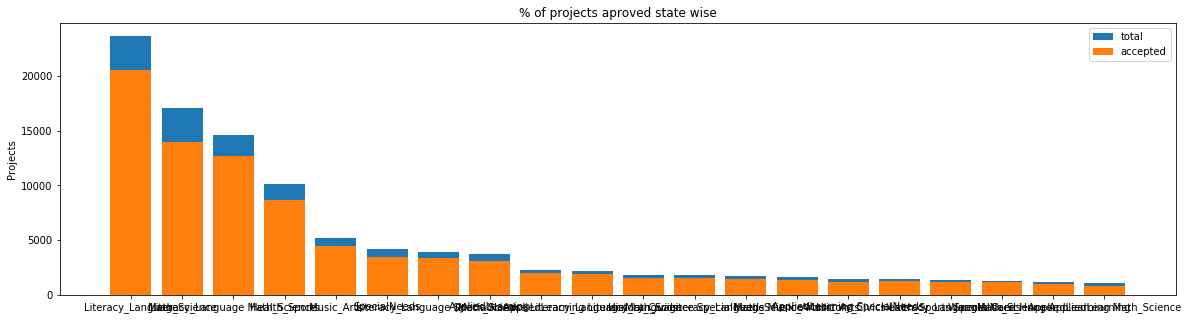

                  clean_categories  project_is_approved  total       Avg
24               Literacy_Language                20520  23655  0.867470
32                    Math_Science                13991  17072  0.819529
28  Literacy_Language Math_Science                12725  14636  0.869432
8                    Health_Sports                 8640  10177  0.848973
40                      Music_Arts                 4429   5180  0.855019
                    clean_categories  project_is_approved  total       Avg
19  History_Civics Literacy_Language                 1271   1421  0.894441
14        Health_Sports SpecialNeeds                 1215   1391  0.873472
50                Warmth Care_Hunger                 1212   1309  0.925898
33      Math_Science AppliedLearning                 1019   1220  0.835246
4       AppliedLearning Math_Science                  855   1052  0.812738


In [236]:
univariate_barplots(project_data, 'clean_categories', 'project_is_approved', top=20)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

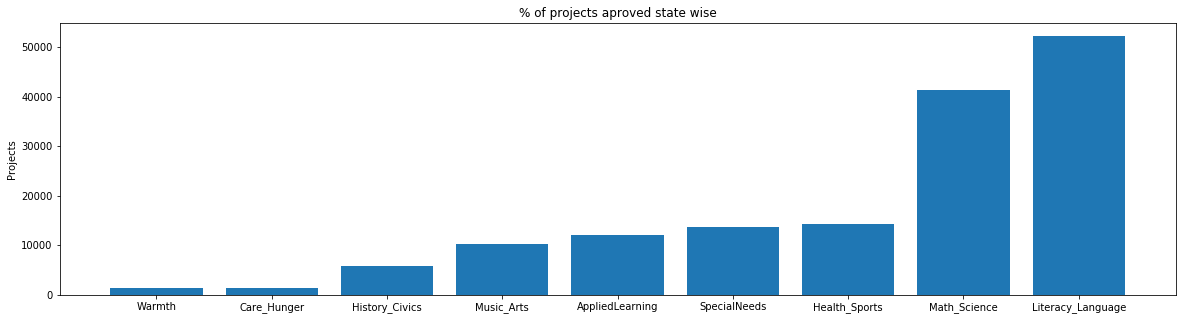

In [238]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_cat_dict.keys()))
plt.show()

In [239]:
for i, j in sorted_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Warmth               :      1388
Care_Hunger          :      1388
History_Civics       :      5914
Music_Arts           :     10293
AppliedLearning      :     12135
SpecialNeeds         :     13642
Health_Sports        :     14223
Math_Science         :     41421
Literacy_Language    :     52239


### Univariate Analysis: project_subject_subcategories

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

In [241]:
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


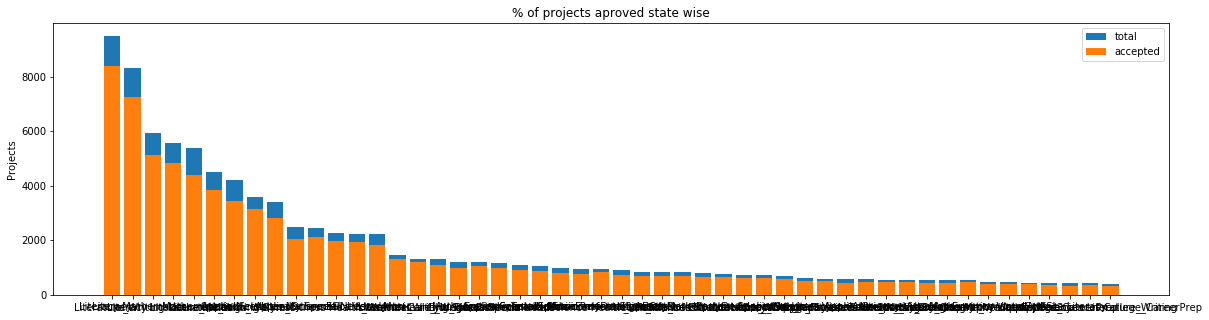

                clean_subcategories  project_is_approved  total       Avg
317                        Literacy                 8371   9486  0.882458
319            Literacy Mathematics                 7260   8325  0.872072
331  Literature_Writing Mathematics                 5140   5923  0.867803
318     Literacy Literature_Writing                 4823   5571  0.865733
342                     Mathematics                 4385   5379  0.815207
                    clean_subcategories  project_is_approved  total       Avg
196       EnvironmentalScience Literacy                  389    444  0.876126
127                                 ESL                  349    421  0.828979
79                   College_CareerPrep                  343    421  0.814727
17   AppliedSciences Literature_Writing                  361    420  0.859524
3    AppliedSciences College_CareerPrep                  330    405  0.814815


In [242]:
univariate_barplots(project_data, 'clean_subcategories', 'project_is_approved', top=50)

In [0]:
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())

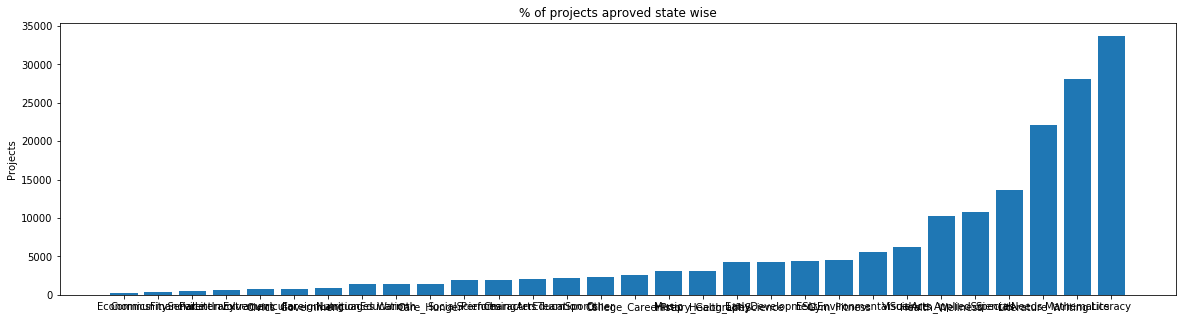

In [244]:
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(sorted_sub_cat_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(sorted_sub_cat_dict.values()))

plt.ylabel('Projects')
plt.title('% of projects aproved state wise')
plt.xticks(ind, list(sorted_sub_cat_dict.keys()))
plt.show()

In [245]:
for i, j in sorted_sub_cat_dict.items():
    print("{:20} :{:10}".format(i,j))

Economics            :       269
CommunityService     :       441
FinancialLiteracy    :       568
ParentInvolvement    :       677
Extracurricular      :       810
Civics_Government    :       815
ForeignLanguages     :       890
NutritionEducation   :      1355
Warmth               :      1388
Care_Hunger          :      1388
SocialSciences       :      1920
PerformingArts       :      1961
CharacterEducation   :      2065
TeamSports           :      2192
Other                :      2372
College_CareerPrep   :      2568
Music                :      3145
History_Geography    :      3171
Health_LifeScience   :      4235
EarlyDevelopment     :      4254
ESL                  :      4367
Gym_Fitness          :      4509
EnvironmentalScience :      5591
VisualArts           :      6278
Health_Wellness      :     10234
AppliedSciences      :     10816
SpecialNeeds         :     13642
Literature_Writing   :     22179
Mathematics          :     28074
Literacy             :     33700


### Univariate Analysis: Text features (Title)

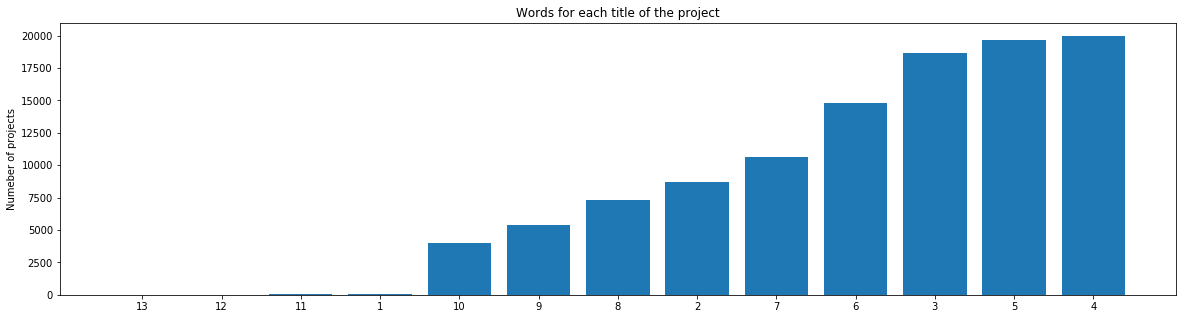

In [246]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['project_title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Numeber of projects')
plt.title('Words for each title of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [0]:
approved_word_count = project_data[project_data['project_is_approved']==1]['project_title'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['project_title'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

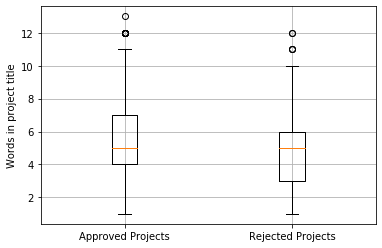

In [248]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

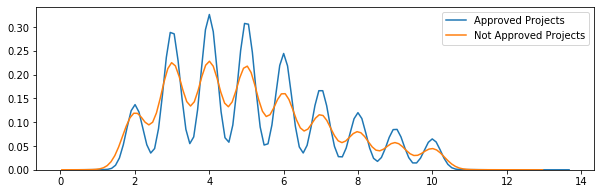

In [249]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.legend()
plt.show()

### Univariate Analysis: Text features (Project Essay's)

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

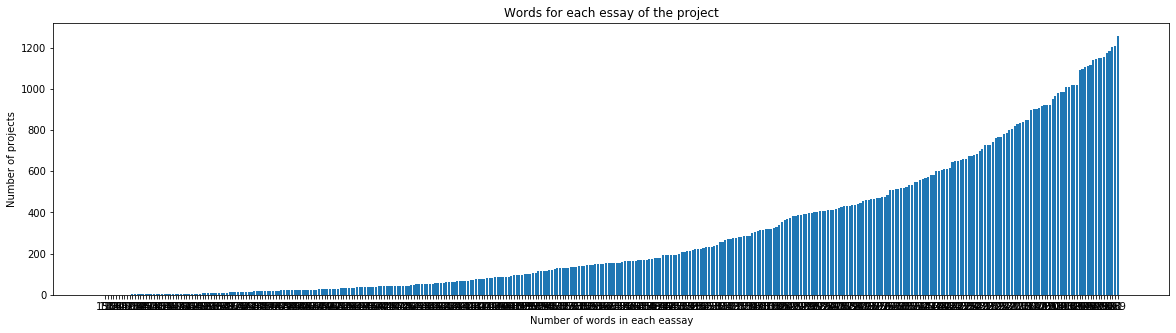

In [251]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = project_data['essay'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of projects')
plt.xlabel('Number of words in each eassay')
plt.title('Words for each essay of the project')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

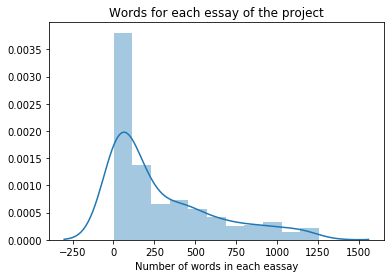

In [252]:
sns.distplot(word_count.values)
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.show()

In [0]:
approved_word_count = project_data[project_data['project_is_approved']==1]['essay'].str.split().apply(len)
approved_word_count = approved_word_count.values

rejected_word_count = project_data[project_data['project_is_approved']==0]['essay'].str.split().apply(len)
rejected_word_count = rejected_word_count.values

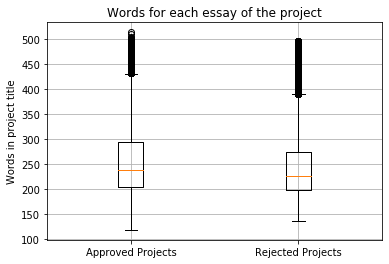

In [254]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_word_count, rejected_word_count])
plt.title('Words for each essay of the project')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

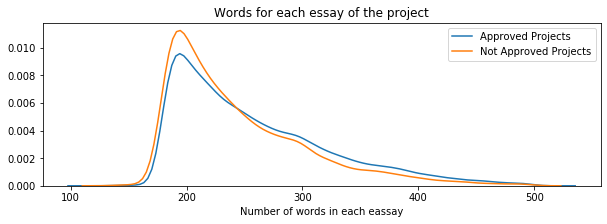

In [255]:
plt.figure(figsize=(10,3))
sns.distplot(approved_word_count, hist=False, label="Approved Projects")
sns.distplot(rejected_word_count, hist=False, label="Not Approved Projects")
plt.title('Words for each essay of the project')
plt.xlabel('Number of words in each eassay')
plt.legend()
plt.show()

### Univariate Analysis: Cost per project

In [256]:
# we get the cost of the project using resource.csv file
resource_data.head(2)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [257]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21


In [0]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [0]:
approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

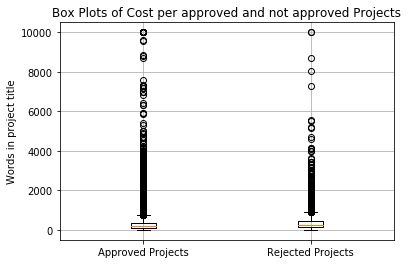

In [260]:
# https://glowingpython.blogspot.com/2012/09/boxplot-with-matplotlib.html
plt.boxplot([approved_price, rejected_price])
plt.title('Box Plots of Cost per approved and not approved Projects')
plt.xticks([1,2],('Approved Projects','Rejected Projects'))
plt.ylabel('Words in project title')
plt.grid()
plt.show()

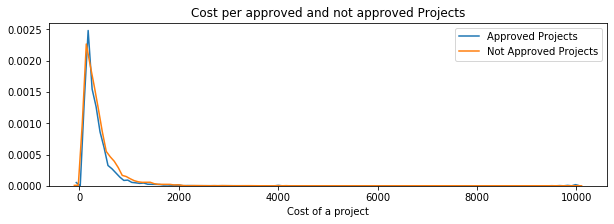

In [261]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

In [262]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_price,i), 3), np.round(np.percentile(rejected_price,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.66       |          1.97         |
|     5      |       13.59       |          41.9         |
|     10     |       33.88       |         73.67         |
|     15     |        58.0       |         99.109        |
|     20     |       77.38       |         118.56        |
|     25     |       99.95       |        140.892        |
|     30     |       116.68      |         162.23        |
|     35     |      137.232      |        184.014        |
|     40     |       157.0       |        208.632        |
|     45     |      178.265      |        235.106        |
|     50     |       198.99      |        263.145        |
|     55     |       223.99      |         292.61        |
|     60     |       255.63      |        325.144        |
|     65     |      285.412      |         362.39       

In [263]:
print("\nColumns in project_data:\n")
print(project_data.columns)

print("Head of project_data:\n")
project_data.head()


Columns in project_data:

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')
Head of project_data:



,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4


# 2. Preprocessing Categorical Features: project_grade_category

In [264]:
project_data['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

we need to remove the spaces, replace the '-' with '_' and convert all the letters to small

In [265]:
# https://stackoverflow.com/questions/36383821/pandas-dataframe-apply-function-to-column-strings-based-on-other-column-value
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(' ','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace('-','_')
project_data['project_grade_category'] = project_data['project_grade_category'].str.lower()
project_data['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

# 3. Preprocessing Categorical Features: project_subject_categories

In [266]:
project_data

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,grades_6_8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,grades_prek_2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,grades_prek_2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109243,38267,p048540,fadf72d6cd83ce6074f9be78a6fcd374,Mr.,MO,2016-06-17 12:02:31,grades_prek_2,Privacy Shields Help Promote Independent Thinking,Welcome to Mr. Ramos's 2nd grade classroom! We...,I would like to start preparing my second grad...,NaN,NaN,My students need these privacy partitions to h...,0,1,Literacy_Language Math_Science,Literature_Writing Mathematics,Welcome to Mr. Ramos's 2nd grade classroom! We...,59.98,8
109244,169142,p166281,1984d915cc8b91aa16b4d1e6e39296c6,Ms.,NJ,2017-01-11 12:49:39,grades_prek_2,Technology in Our Classroom,"Every morning, we start our day with our core ...","In this technological age, we need to give our...",NaN,NaN,My students need two iPad's and protective cas...,0,1,Literacy_Language Math_Science,Literacy Mathematics,"Every morning, we start our day with our core ...",846.32,4
109245,143653,p155633,cdbfd04aa041dc6739e9e576b1fb1478,Mrs.,NJ,2016-08-25 17:11:32,grades_prek_2,2016/2017 Beginning of the Year Basics,This is a great group of sharing and caring st...,"My students learn about special events, holida...",NaN,NaN,My students need giant comfy pillows in order ...,3,1,Literacy_Language Math_Science,Literacy Mathematics,This is a great group of sharing and caring st...,239.96,4
109246,164599,p206114,6d5675dbfafa1371f0e2f6f1b716fe2d,Mrs.,NY,2016-07-29 17:53:15,grades_3_5,Flexible Seating in Inclusive Classroom,Our students live in a small rural community. ...,Flexible classroom seating has been researched...,NaN,NaN,My students need flexible seating options: bea...,0,1,Health_Sports SpecialNeeds,Health_Wellness SpecialNeeds,Our students live in a small rural co

In [268]:
project_data['clean_categories'].value_counts()

Literacy_Language                       23655
Math_Science                            17072
Literacy_Language Math_Science          14636
Health_Sports                           10177
Music_Arts                               5180
SpecialNeeds                             4226
Literacy_Language SpecialNeeds           3961
AppliedLearning                          3771
Math_Science Literacy_Language           2289
AppliedLearning Literacy_Language        2191
History_Civics                           1851
Math_Science SpecialNeeds                1840
Literacy_Language Music_Arts             1757
Math_Science Music_Arts                  1642
AppliedLearning SpecialNeeds             1467
History_Civics Literacy_Language         1421
Health_Sports SpecialNeeds               1391
Warmth Care_Hunger                       1309
Math_Science AppliedLearning             1220
AppliedLearning Math_Science             1052
Literacy_Language History_Civics          809
Health_Sports Literacy_Language   

>remove spaces, 'the' <br>
replace '&' with '\_', and ',' with '_'

In [0]:
# project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' The ','')
# project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(' ','')
# project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace('&','_')
# project_data['project_subject_categories'] = project_data['project_subject_categories'].str.replace(',','_')
# project_data['project_subject_categories'] = project_data['project_subject_categories'].str.lower()
# project_data['project_subject_categories'].value_counts()

# 4. Preprocessing Categorical Features: teacher_prefix

In [269]:
project_data['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [270]:
# check if we have any nan values are there
print(project_data['teacher_prefix'].isnull().values.any())
print("number of nan values",project_data['teacher_prefix'].isnull().values.sum())

True
number of nan values 3


>numebr of missing values are very less in number, we can replace it with Mrs. as most of the projects are submitted by Mrs.

In [0]:
project_data['teacher_prefix']=project_data['teacher_prefix'].fillna('Mrs.')

In [272]:
project_data['teacher_prefix'].value_counts()

Mrs.       57272
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

>Remove '.' <br>
>convert all the chars to small

In [273]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.','')
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.lower()
project_data['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

# 5. Preprocessing Categorical Features: project_subject_subcategories

In [274]:
project_data['clean_subcategories'].value_counts()

Literacy                                9486
Literacy Mathematics                    8325
Literature_Writing Mathematics          5923
Literacy Literature_Writing             5571
Mathematics                             5379
                                        ... 
Civics_Government ParentInvolvement        1
ParentInvolvement Warmth Care_Hunger       1
Economics Other                            1
Other Warmth Care_Hunger                   1
CommunityService Music                     1
Name: clean_subcategories, Length: 401, dtype: int64

> same process we did in project_subject_categories

In [0]:
# project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' The ','')
# project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(' ','')
# project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace('&','_')
# project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.replace(',','_')
# project_data['project_subject_subcategories'] = project_data['project_subject_subcategories'].str.lower()
# project_data['project_subject_subcategories'].value_counts()

# 6. Preprocessing Categorical Features: school_state

In [275]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

>convert all of them into small letters

In [276]:
project_data['school_state'] = project_data['school_state'].str.lower()
project_data['school_state'].value_counts()

ca    15388
tx     7396
ny     7318
fl     6185
nc     5091
il     4350
ga     3963
sc     3936
mi     3161
pa     3109
in     2620
mo     2576
oh     2467
la     2394
ma     2389
wa     2334
ok     2276
nj     2237
az     2147
va     2045
wi     1827
al     1762
ut     1731
tn     1688
ct     1663
md     1514
nv     1367
ms     1323
ky     1304
or     1242
mn     1208
co     1111
ar     1049
id      693
ia      666
ks      634
nm      557
dc      516
hi      507
me      505
wv      503
nh      348
ak      345
de      343
ne      309
sd      300
ri      285
mt      245
nd      143
wy       98
vt       80
Name: school_state, dtype: int64

# 7. Preprocessing Categorical Features: project_title

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [279]:
project_data.head(5) 

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms,az,2016-08-31 12:03:56,grades_6_8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",516.85,22
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,mrs,ky,2016-10-06 21:16:17,grades_prek_2,Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1,Literacy_Language Math_Science,Literacy Mathematics,I work at a unique school filled with both ESL...,232.90,4
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,mrs,tx,2016-07-11 01:10:09,grades_prek_2,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1,Math_Science,Mathematics,Our second grade classroom next year will be m...,67.98,4


In [280]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [0]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [282]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|██████████| 109248/109248 [00:02<00:00, 48133.77it/s]


In [283]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


# 8. Preprocessing Categorical Features: essay

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [285]:
print("printing some random essay")
print(9, project_data['essay'].values[9])
print('-'*50)
print(34, project_data['essay'].values[34])
print('-'*50)
print(147, project_data['essay'].values[147])

printing some random essay
9 Over 95% of my students are on free or reduced lunch.  I have a few who are homeless, but despite that, they come to school with an eagerness to learn.  My students are inquisitive eager learners who  embrace the challenge of not having great books and other resources  every day.  Many of them are not afforded the opportunity to engage with these big colorful pages of a book on a regular basis at home and they don't travel to the public library.  \r\nIt is my duty as a teacher to do all I can to provide each student an opportunity to succeed in every aspect of life. \r\nReading is Fundamental! My students will read these books over and over again while boosting their comprehension skills. These books will be used for read alouds, partner reading and for Independent reading. \r\nThey will engage in reading to build their \"Love for Reading\" by reading for pure enjoyment. They will be introduced to some new authors as well as some old favorites. I want my st

In [286]:
preprocessed_essays = preprocess_text(project_data['essay'].values)

100%|██████████| 109248/109248 [00:53<00:00, 2052.42it/s]


In [287]:
print("printing some random essay")
print(9, preprocessed_essays[9])
print('-'*50)
print(34, preprocessed_essays[34])
print('-'*50)
print(147, preprocessed_essays[147])

printing some random essay
9 95 students free reduced lunch homeless despite come school eagerness learn students inquisitive eager learners embrace challenge not great books resources every day many not afforded opportunity engage big colorful pages book regular basis home not travel public library duty teacher provide student opportunity succeed every aspect life reading fundamental students read books boosting comprehension skills books used read alouds partner reading independent reading engage reading build love reading reading pure enjoyment introduced new authors well old favorites want students ready 21st century know pleasure holding good hard back book hand nothing like good book read students soar reading consideration generous funding contribution help build stamina prepare 3rd grade thank much reading proposal nannan
--------------------------------------------------
34 students mainly come extremely low income families majority come homes parents work full time students s

In [0]:
project_data['essay'] = preprocessed_essays

# 8. Preprocessing Numerical Values: price

## 8.1 applying StandardScaler

In [289]:
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )
"""

"\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(project_data['price'].values.reshape(-1, 1))\nproject_data['std_price']=scaler.transform(project_data['price'].values.reshape(-1, 1) )\n"

## 8.2 applying MinMaxScaler

In [290]:
"""
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(project_data['price'].values.reshape(-1, 1))
project_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))
"""

"\nfrom sklearn.preprocessing import MinMaxScaler\n\nscaler = MinMaxScaler()\nscaler.fit(project_data['price'].values.reshape(-1, 1))\nproject_data['nrm_price']=scaler.transform(project_data['price'].values.reshape(-1, 1))\n"

In [0]:
project_data.to_csv('drive/My Drive/Stuff/DonorsChooseData/preprocess.csv', index = False)

# -------------------- LSTM on DonorsChoose -------------------- 

In [0]:
project_data = pd.read_csv('drive/My Drive/Stuff/DonorsChooseData/preprocess.csv')

In [8]:
print("Shape of dataframe:", project_data.shape)
print("Number of rows:", project_data.shape[0])
print("Number of columns:", project_data.shape[1], '\n')
print("Column names:")
print(project_data.columns)

print("\nHead 3 of dataframe:\n")
project_data.head(3)

Shape of dataframe: (109248, 20)
Number of rows: 109248
Number of columns: 20 

Column names:
Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

Head 3 of dataframe:



,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,2016-12-05 13:43:57,grades_prek_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,students english learners working english seco...,154.60,23
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,2016-10-25 09:22:10,grades_6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...,299.00,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms,az,2016-08-31 12:03:56,grades_6_8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts mia ha...,516.85,22


In [9]:
print("\nChecking for null values\n")
project_data.info()


Checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 20 columns):
Unnamed: 0                                      109248 non-null int64
id                                              109248 non-null object
teacher_id                                      109248 non-null object
teacher_prefix                                  109248 non-null object
school_state                                    109248 non-null object
project_submitted_datetime                      109248 non-null object
project_grade_category                          109248 non-null object
project_title                                   109248 non-null object
project_essay_1                                 109248 non-null object
project_essay_2                                 109248 non-null object
project_essay_3                                 3758 non-null object
project_essay_4                                 3758 non-null object
project_resourc

In [10]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay', 'price',
       'quantity'],
      dtype='object')

In [24]:
# Extracting numerical digits from project_resource_summary

summary = []
for i in tqdm(project_data['project_resource_summary']):
    sent = decontracted(i)
    sent = ' '.join(w for w in sent.split() if w.isdigit())
    l = len(sent)
    summary.append(l)

project_data["project_summary_numerical"] = summary

100%|██████████| 109248/109248 [00:01<00:00, 100272.25it/s]


In [0]:
project_data_1 = project_data.drop(['Unnamed: 0', 'id', 'teacher_id', 'project_submitted_datetime', 'project_title',
                                    'project_essay_1', 'project_essay_2', 'project_essay_3', 'project_essay_4',
                                    'project_resource_summary'], axis = 1)

In [26]:
project_data_1.head(5)

,teacher_prefix,school_state,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,quantity,project_summary_numerical
0,mrs,in,grades_prek_2,0,0,Literacy_Language,ESL Literacy,students english learners working english seco...,154.60,23,0
1,mr,fl,grades_6_8,7,1,History_Civics Health_Sports,Civics_Government TeamSports,students arrive school eager learn polite gene...,299.00,1,0
2,ms,az,grades_6_8,1,0,Health_Sports,Health_Wellness TeamSports,true champions not always ones win guts mia ha...,516.85,22,0
3,mrs,ky,grades_prek_2,4,1,Literacy_Language Math_Science,Literacy Mathematics,work unique school filled esl english second l...,232.90,4,0
4,mrs,tx,grades_prek_2,1,1,Math_Science,Mathematics,second grade classroom next year made around 2...,67.98,4,0


### Assigning independent variables (x) and dependent variable (y)

In [0]:
x = project_data_1.drop(['project_is_approved'], axis = 1)
y = project_data_1['project_is_approved']

### Splitting into train, cv and test set

In [0]:
from sklearn.model_selection import train_test_split

# Splitting into x and y into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42, stratify = y_train)

In [29]:
print("Shape of x_tr:", x_tr.shape)
print("Shape of x_cv:", x_cv.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of y_cv:", y_cv.shape)
print("Shape of y_test:", y_test.shape)

Shape of x_tr: (65548, 10)
Shape of x_cv: (21850, 10)
Shape of x_test: (21850, 10)
Shape of y_tr: (65548,)
Shape of y_cv: (21850,)
Shape of y_test: (21850,)


##### Loading GloVe predefined glove word vector

##### There are a few different embedding vector sizes, including 50, 100, 200 and 300 dimensions.
##### We will use 42B 300 dimensions

##### Source links:

##### https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

##### https://nlp.stanford.edu/projects/glove/

##### https://github.com/stanfordnlp/GloVe

### We have loaded zipped file. Now we will unzip the file to use for our model

### Source link: https://www.geeksforgeeks.org/working-zip-files-python/

In [32]:
"""
from zipfile import ZipFile

file_name = "glove.42B.300d.zip"

with ZipFile(file_name, 'r') as zip: 
     
    zip.printdir() 
  
    # Extracting all the files 
    print('Extracting all the files from zip file')
    zip.extractall() 
    print('Done!') 
"""

'\nfrom zipfile import ZipFile\n\nfile_name = "glove.42B.300d.zip"\n\nwith ZipFile(file_name, \'r\') as zip: \n     \n    zip.printdir() \n  \n    # Extracting all the files \n    print(\'Extracting all the files from zip file\')\n    zip.extractall() \n    print(\'Done!\') \n'

In [33]:
"""
glove_words = {}

with open("glove.42B.300d.txt") as glove:
  
  for data in glove:
    words = data.split()
    word = words[0]
    vec = np.asarray(words[1:], dtype='float32')
    glove_words[word] = vec
print("Number of words in glove vector:", len(glove_words))

"""

'\nglove_words = {}\n\nwith open("glove.42B.300d.txt") as glove:\n  \n  for data in glove:\n    words = data.split()\n    word = words[0]\n    vec = np.asarray(words[1:], dtype=\'float32\')\n    glove_words[word] = vec\nprint("Number of words in glove vector:", len(glove_words))\n\n'

In [0]:
### Import glove_vectors file

with open('drive/My Drive/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  model

### Defining sequence length, vocabulary size and embedding size.

In [0]:
# Defining sequence length, vocabulary size and embedding size

seq_len = 500
vocab_size = 100000
emb_dim = 300

### Tokenize:

##### Input data to layer should be integer. So, using tokenize inbuilt function, we will integer encode the text data.

In [38]:
from keras.preprocessing.text import Tokenizer

t = Tokenizer(num_words = vocab_size)

# Fit train text data
t.fit_on_texts(x_tr['essay'])

# Sequencing train, cv and test data i.e transforming
tr_seq = t.texts_to_sequences(x_tr['essay'])
cv_seq = t.texts_to_sequences(x_cv['essay'])
test_seq = t.texts_to_sequences(x_test['essay'])
print('Done!')

Done!


In [40]:
# Let's create a weight matrix of train data from the glove vector.

from numpy import zeros

word_count = min(vocab_size, len(t.word_index) + 1)

emb_matrix = zeros((word_count, emb_dim))
for word, i in t.word_index.items():
	emb_vec = glove_words.get(word)
	if emb_vec is not None:
		emb_matrix[i] = emb_vec
        
print("Number for unique words in train data:", len(t.word_index) + 1)
print("Shape of train weight matrix:", emb_matrix.shape)

Number for unique words in train data: 45966
Shape of train weight matrix: (45966, 300)


### Padding document

##### Padding document is to have the same input length of each document.

In [42]:
from keras.preprocessing.sequence import pad_sequences

pad_tr = pad_sequences(tr_seq, maxlen = seq_len, padding = 'post', truncating = 'post') 
pad_cv = pad_sequences(cv_seq, maxlen = seq_len, padding = 'post', truncating = 'post') 
pad_test = pad_sequences(test_seq, maxlen = seq_len, padding = 'post', truncating = 'post') 

print("Shape of pad_tr:", pad_tr.shape)
print("Shape of pad_cv:", pad_cv.shape)
print("Shape of pad_test:", pad_test.shape)

Shape of pad_tr: (65548, 500)
Shape of pad_cv: (21850, 500)
Shape of pad_test: (21850, 500)


### Embedding layer for text data

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
from keras.layers import Embedding, Dense, Flatten, Input, LSTM, Dropout, BatchNormalization, concatenate


input_size = min(vocab_size, len(t.word_index) + 1)

# Creating an input layer
input_lay = Input(shape = (seq_len, ), name = "Input_Text_Data")

# Creating an embedding layer
emb_lay = Embedding(input_dim = input_size, output_dim = emb_dim,
                         input_length = seq_len, weights = [emb_matrix],
                         trainable = False, name = "lstm_text_layer")(input_lay)

# Creating LSTM layer
emb_lay_text = LSTM(128, return_sequences = True, dropout = 0.3)(emb_lay)

flatten_1 = Flatten()(emb_lay_text)










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Categorical Feature: teacher_prefix
##### Embedding layer for teacher_prefix

In [0]:
# Unique values
tea_pre_uni = x_tr['teacher_prefix'].nunique()
emb_tea_pre_size = int(np.ceil((tea_pre_uni) / 2))

# Creating an input layer
inp_tea_pre = Input(shape = (1,), name = "teacher_prefix")

# Creating an embedding layer
emb_tea_pre = Embedding(input_dim = tea_pre_uni, output_dim = emb_tea_pre_size,
                         trainable = True, name = "teacher_prefix_emb")(inp_tea_pre)

flatten_tea_pre = Flatten()(emb_tea_pre)

### Label encoding teacher_prefix

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_tea_pre_encode = le.fit_transform(x_tr['teacher_prefix'])
cv_tea_pre_encode = le.transform(x_cv['teacher_prefix'])
test_tea_pre_encode = le.transform(x_test['teacher_prefix'])

### Categorical feature: school_state
##### Embedding layer for school_state

In [0]:
# Unique values
sch_uni = x_tr['school_state'].nunique()
emb_sch_size = int(np.ceil((sch_uni) / 2))

# Creating an input layer
inp_sch = Input(shape = (1,), name = "school_state")

# Creating an embedding layer
emb_sch = Embedding(input_dim = sch_uni, output_dim = emb_sch_size,
                         trainable = True, name = "school_state_emb")(inp_sch)

flatten_sch = Flatten()(emb_sch)


### Label encoding for school_state

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_sch_encode = le.fit_transform(x_tr['school_state'])
cv_sch_encode = le.transform(x_cv['school_state'])
test_sch_encode = le.transform(x_test['school_state'])

### Categorical feature: project_grade_category
##### Creating embedding layer for project_grade_category

In [0]:
# Unique values
pro_gra_uni = x_tr['project_grade_category'].nunique()
emb_pro_gra_size = int(np.ceil((pro_gra_uni) / 2))

# Creating an input layer
inp_pro_gra = Input(shape = (1,), name = "project_grade_category")

# Creating an embedding layer
emb_pro_gra = Embedding(input_dim = pro_gra_uni, output_dim = emb_pro_gra_size,
                         trainable = True, name = "project_grade_category_emb")(inp_pro_gra)

flatten_pro_gra = Flatten()(emb_pro_gra)

### Label encoding for project_grade_category

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

tr_pro_gra_encode = le.fit_transform(x_tr['project_grade_category'])
cv_pro_gra_encode = le.transform(x_cv['project_grade_category'])
test_pro_gra_encode = le.transform(x_test['project_grade_category'])

### Categorical feature: project_subject_categories
##### Embedding layer for project_subject_categories

In [0]:
# Unique values
pro_sub_uni = x_tr['clean_categories'].nunique()
emb_pro_sub_size = int(np.ceil((pro_sub_uni) / 2))

# Creating an input layer
inp_pro_sub = Input(shape = (1,), name = "clean_categories")

# Creating an embedding layer
emb_pro_sub = Embedding(input_dim = pro_sub_uni, output_dim = emb_pro_sub_size,
                         trainable = True, name = "clean_categories_emb")(inp_pro_sub)

flatten_pro_sub = Flatten()(emb_pro_sub)


### Label encoding for project_subject_categories

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(x_tr['clean_subcategories'])

x_test["clean_subcategories"] = x_test["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)
x_cv["clean_subcategories"] = x_cv["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)

le.classes_ = np.append(le.classes_, '<unknown>')

tr_pro_sub_encode = le.transform(x_tr['clean_subcategories'])
cv_pro_sub_encode = le.transform(x_cv['clean_subcategories'])
test_pro_sub_encode = le.transform(x_test['clean_subcategories'])

### Categorical feature: project_subject_subcategories
##### Embedding layer for project_subject_subcategories

In [0]:
# Unique values
pro_sub_1_uni = x_tr['clean_subcategories'].nunique()
emb_pro_sub_1_size = int(min(np.ceil((pro_sub_1_uni) / 2), 50))

# Creating an input layer
inp_pro_sub_1 = Input(shape = (1,), name = "clean_subcategories")

# Creating an embedding layer
emb_pro_sub_1 = Embedding(input_dim = pro_sub_1_uni, output_dim = emb_pro_sub_1_size,
                         trainable = True, name = "cleant_subcategories_emb")(inp_pro_sub)

flatten_pro_sub_1 = Flatten()(emb_pro_sub_1)


### Label encoding for project_subject_subcategories

In [0]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(x_tr["clean_subcategories"])

x_test["clean_subcategories"] = x_test["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)
x_cv["clean_subcategories"] = x_cv["clean_subcategories"].map(lambda a: '<unknown>' if a not in le.classes_ else a)

le.classes_ = np.append(le.classes_, '<unknown>')

tr_sub_1_encoder = le.transform(x_tr["clean_subcategories"])
cv_sub_1_encoder = le.transform(x_cv["clean_subcategories"])
test_sub_1_encoder = le.transform(x_test["clean_subcategories"])

# Numerical Features

##### We will reshape the numerical features to (-1, 1). Then concatenate numerical features and standardize the final output

In [0]:
# Train data
tr_1 = x_tr['price'].values.reshape(-1, 1)
tr_2 = x_tr['quantity'].values.reshape(-1, 1)
tr_3 = x_tr['project_summary_numerical'].values.reshape(-1, 1)
tr_4 = x_tr['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# CV data
cv_1 = x_cv['price'].values.reshape(-1, 1)
cv_2 = x_cv['quantity'].values.reshape(-1, 1)
cv_3 = x_cv['project_summary_numerical'].values.reshape(-1, 1)
cv_4 = x_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# Test data
test_1 = x_test['price'].values.reshape(-1, 1)
test_2 = x_test['quantity'].values.reshape(-1, 1)
test_3 = x_test['project_summary_numerical'].values.reshape(-1, 1)
test_4 = x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

### Concatenating above reshaped features

In [0]:
# Train 
tr_fin = np.concatenate((tr_1, tr_2, tr_3, tr_4), axis = 1)

# CV
cv_fin = np.concatenate((cv_1, cv_2, cv_3, cv_4), axis = 1)

# Test
test_fin = np.concatenate((test_1, test_2, test_3, test_4), axis = 1)

### Standardizing the final data

In [0]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

tr_ss = ss.fit_transform(tr_fin)
cv_ss = ss.transform(cv_fin)
test_ss = ss.transform(test_fin)

### Embedding layer for numerical features

In [0]:
inp_num = Input(shape=(4,), name = "numerical_features")

# We are not adding Flatten layer but applying Dense layer as we already have reshaped the data to (-1,1)
emb_num = Dense(100, activation = "relu")(inp_num)


### Concatenating all the flattened layers

In [0]:
 from keras.layers import concatenate
    
con_lay = concatenate([flatten_1, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, emb_num])

# -------------------- Model: 1 --------------------

### Keras model:
 - Activation - 'relu' and 'softmax'.
 - Dropout - 0.3
 - kernel_regularizer - regularizers.l2(0.01)

In [0]:
from keras.models import Model
from keras import regularizers, initializers

# Layer 1
m = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(con_lay)
m = Dropout(0.3)(m)

# Layer 2
m = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 3
m = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Layer 4
m = Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m)
m = Dropout(0.3)(m)

# Output layer
output = Dense(2, activation = 'softmax', name= 'model_1_output')(m)

# Model
model_1 = Model(inputs = [input_lay, inp_tea_pre, inp_sch, inp_pro_gra,
                        inp_pro_sub, inp_pro_sub_1, inp_num], outputs = [output])

## Network Architecture

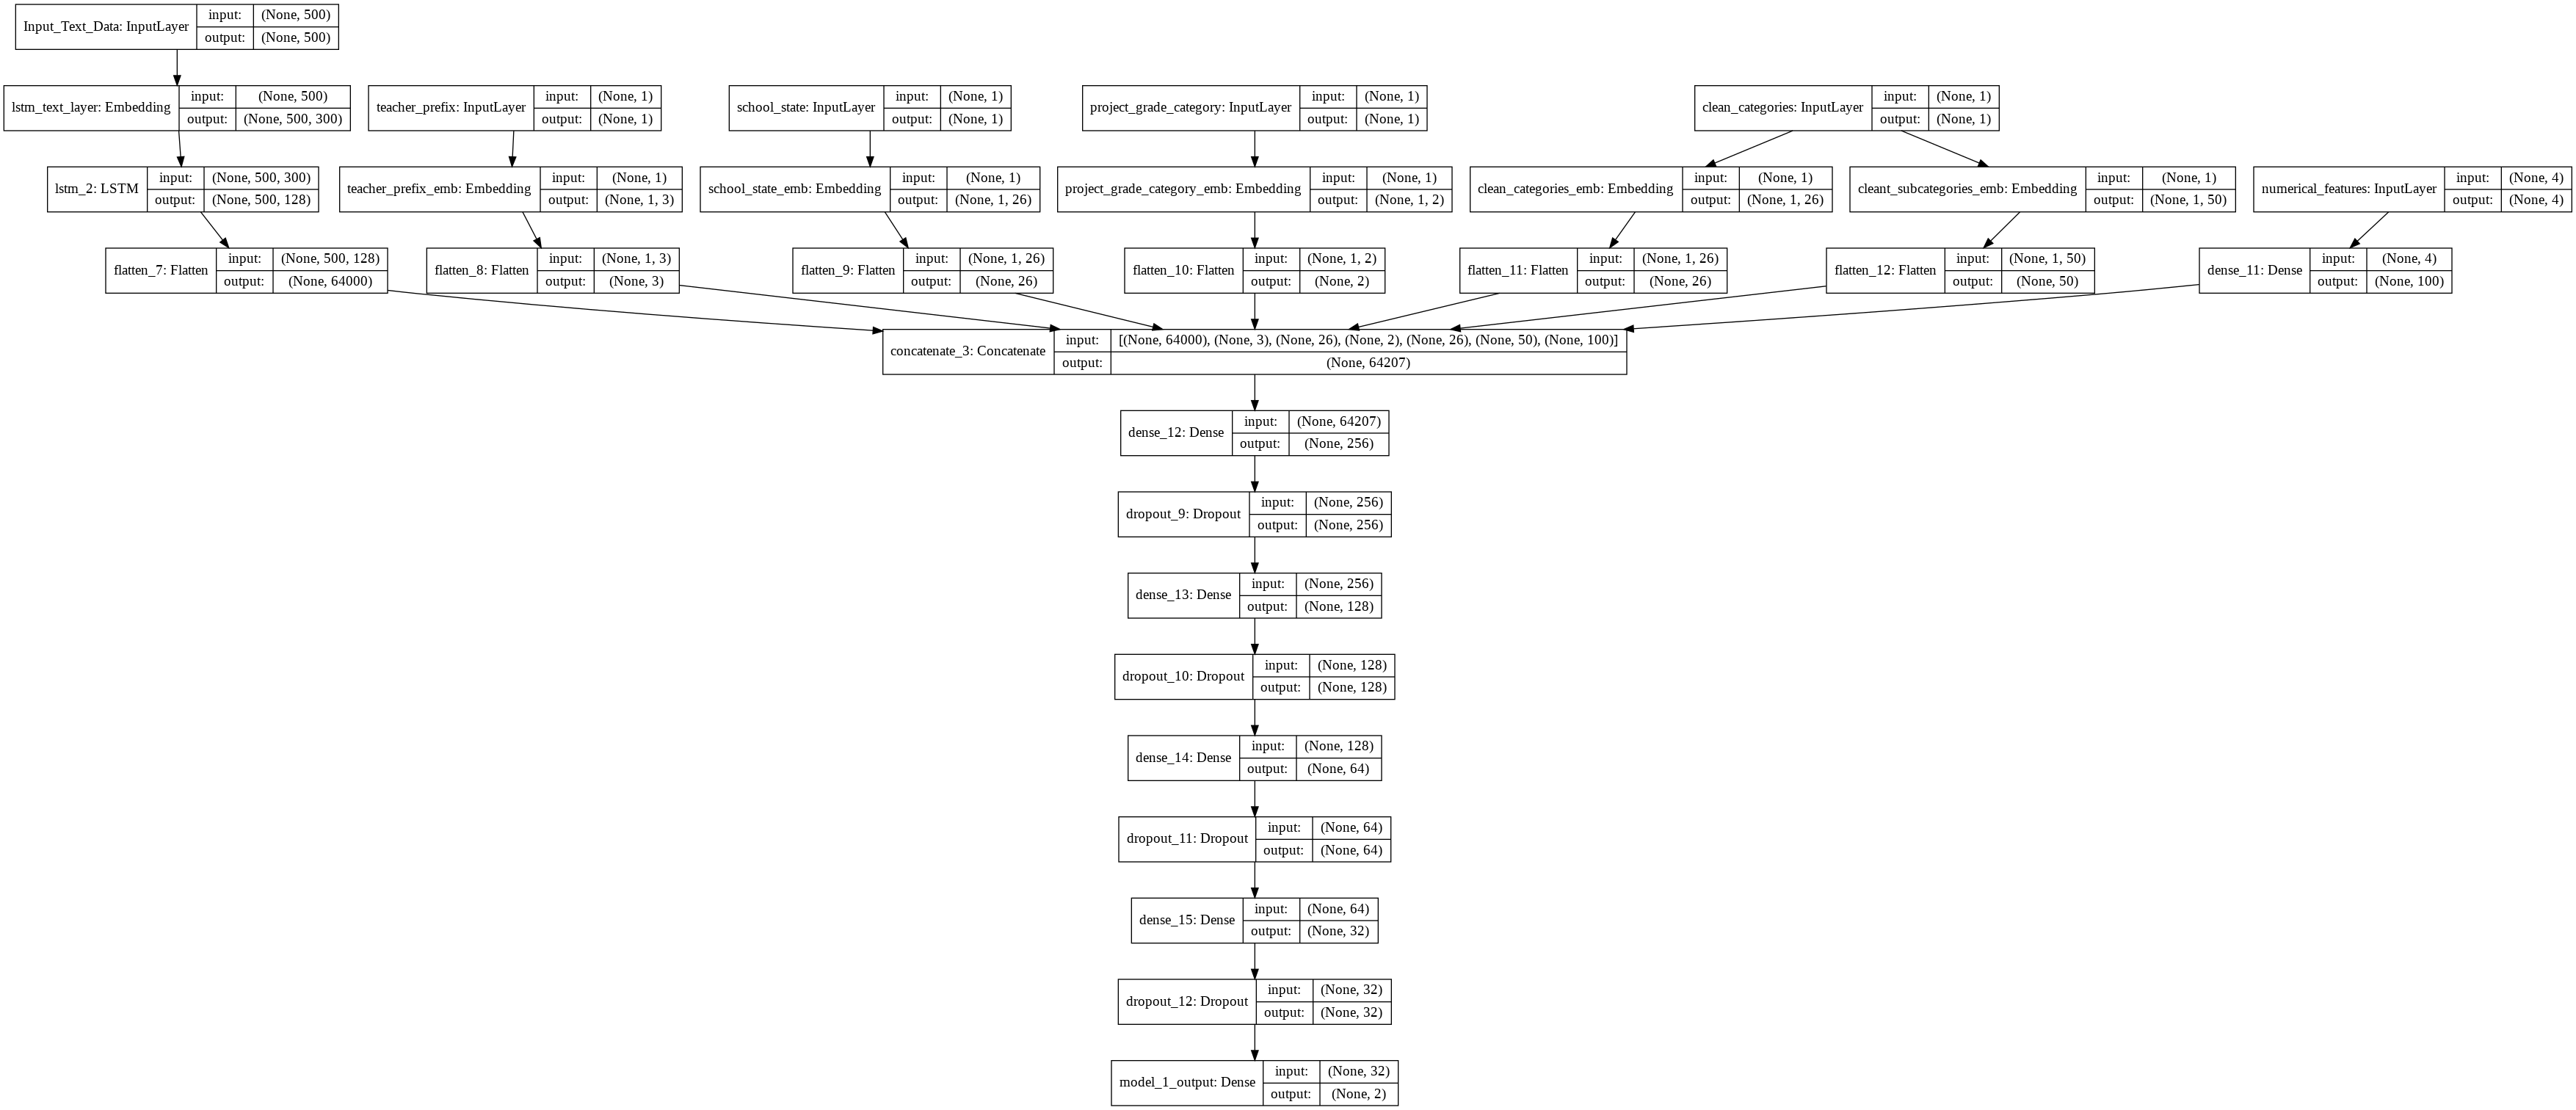

In [371]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_1, show_shapes = True, show_layer_names = True, to_file = 'model_1.png')

Image(retina = True, filename = 'model_1.png')

### Getting all data into list.

In [0]:
# Train data
tr_data_1 = [pad_tr, tr_tea_pre_encode, tr_sch_encode, tr_pro_sub_encode, tr_sub_1_encoder, tr_pro_gra_encode, tr_ss]

# CV data
cv_data_1 = [pad_cv, cv_tea_pre_encode, cv_sch_encode, cv_pro_sub_encode, cv_sub_1_encoder, cv_pro_gra_encode, cv_ss]

# Test data
test_data_1 = [pad_test, test_tea_pre_encode, test_sch_encode, test_pro_sub_encode, test_sub_1_encoder, test_pro_gra_encode, test_ss]

### Chaning type of dependent variable (y) to categorical type

In [0]:
from keras.utils import np_utils

y_tr_data_1 = np_utils.to_categorical(y_tr, 2) 
y_cv_data_1 = np_utils.to_categorical(y_cv, 2)
y_test_data_1 = np_utils.to_categorical(y_test, 2)

### AUC-ROC custom function

##### Source link: https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras

In [0]:
from sklearn.metrics import roc_auc_score

import tensorflow as tf

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

### Creating Callback with Checkpoint, EarlyStopping and Tensorboard

##### Source: https://keras.io/callbacks/

In [0]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_1 = ModelCheckpoint("model_1.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_1 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_1 = TensorBoard(log_dir = "drive/My Drive/Stuff/DonorsChooseData/graph_1",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_1 = [checkpoint_1, earlystop_1, tensorboard_1]

### Compile the data

 - __Optimizer: rmsprop__
 - __Dropout - 0.3__
 - __Loss: categorical_crossentropy__
 - __Metric: AUC-ROC__

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.optimizers import Adam, RMSprop

model_1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [auroc])

### Fitting model and callback to visualize model

In [383]:
try:
  history_1 = model_1.fit(tr_data_1, y_tr_data_1, batch_size = 512,
                        epochs = 30, validation_data = (cv_data_1, y_cv_data_1), verbose = 1,
                        callbacks = callback_1)
except ValueError:
    pass

Train on 65548 samples, validate on 21850 samples
Epoch 1/30
65548/65548 [==============================] - 102s 2ms/step - loss: 0.4568 - auroc: 0.7157 - val_loss: 0.4983 - val_auroc: 0.7414

Epoch 00001: val_loss improved from 0.52307 to 0.49827, saving model to model_1.h5
Epoch 2/30
65548/65548 [==============================] - 104s 2ms/step - loss: 0.4500 - auroc: 0.7326 - val_loss: 0.4922 - val_auroc: 0.7471

Epoch 00002: val_loss improved from 0.49827 to 0.49224, saving model to model_1.h5
Epoch 3/30
65548/65548 [==============================] - 104s 2ms/step - loss: 0.4476 - auroc: 0.7328 - val_loss: 0.5100 - val_auroc: 0.7478

Epoch 00003: val_loss did not improve from 0.49224
Epoch 4/30
65548/65548 [==============================] - 103s 2ms/step - loss: 0.4426 - auroc: 0.7431 - val_loss: 0.4667 - val_auroc: 0.7505

Epoch 00004: val_loss improved from 0.49224 to 0.46667, saving model to model_1.h5
Epoch 5/30
65548/65548 [==============================] - 103s 2ms/step - loss

### Evaluating test data

21850/21850 [==============================] - 13s 615us/step
Test Loss: 0.46906941578371847
Test ROC-AUC score: 0.7470502497988012 



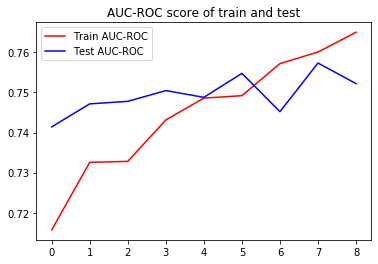

In [384]:
# Evaluating test data
score_1 = model_1.evaluate(test_data_1, y_test_data_1, verbose = 1, batch_size = 512)
print('Test Loss:', score_1[0])
print('Test ROC-AUC score:', score_1[1], '\n')

# Plotting train and test auc roc score
plt.plot(history_1.history['auroc'], 'r')
plt.plot(history_1.history['val_auroc'], 'b')
plt.title("AUC-ROC score of train and test")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b'})
plt.show()

### Observation:

 - Test Loss - 0.469
 - Test AUC-ROC - 0.747

# ----------------------------------- Model - 2 ----------------------------------- 

In [0]:
x = project_data_1.drop(['project_is_approved'], axis = 1)
y = project_data_1['project_is_approved']

In [0]:
from sklearn.model_selection import train_test_split

# Splitting into x and y into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42, stratify = y)

# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train,  test_size = 0.25, random_state = 42, stratify = y_train)

In [79]:
print("Shape of x_tr:", x_tr.shape)
print("Shape of x_cv:", x_cv.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of y_cv:", y_cv.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_tr: (65548, 10)
Shape of x_cv: (21850, 10)
Shape of x_test: (21850, 10)
Shape of y_tr: (65548,)
Shape of y_cv: (21850,)
Shape of y_test: (21850,)


### Applying TF-IDF vectorizer

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

# Fit and transform train data
x_tr_tf = tf.fit_transform(x_tr.essay)

# Transform cv data
x_cv_tf = tf.transform(x_cv.essay)

# Transform test data
x_te_tf = tf.transform(x_test.essay)

### Getting IDF values and Feature Names

In [82]:
# Let take a look on first 10 idf values

print("First 10 idf values\n")
print(tf.idf_[:10])

First 10 idf values

[ 7.21535591  5.90846833 11.39740605 11.39740605 11.39740605 10.14464308
 11.39740605  9.60564658 10.70425887 11.39740605]


In [0]:
# Zipping feature names corresponding to idf_ values

feat_idf = sorted(zip(tf.idf_, tf.get_feature_names()))

In [84]:
print("First 5 feature names along with idf values:\n")

print(feat_idf[:5])

print("\nLast 5 feature names along with idf values:\n")

print(feat_idf[-5:])

First 5 feature names along with idf values:

[(1.0075034040634312, 'students'), (1.0449310470519895, 'nannan'), (1.1630512280481382, 'school'), (1.3624517377069705, 'learning'), (1.3942315490623014, 'classroom')]

Last 5 feature names along with idf values:

[(11.397406052985405, 'zundel'), (11.397406052985405, 'zwink'), (11.397406052985405, 'zx110'), (11.397406052985405, 'zydeco'), (11.397406052985405, 'zynergy')]


### Box plot

Box plot for idf values



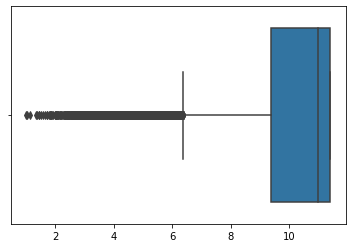

In [86]:
print("Box plot for idf values\n")
sns.boxplot(tf.idf_)
plt.show()

### Observation:

 - Quartile 1: IDF values ranges from 0 to 9.3.
 - Quartile 2: IDF values ranges from 9.4 to 10.99.
 - Quartile 3: IDF values ranges from 11 to 11.39.
 - Quartile 4" IDF values ranges from 11.39 to 11.399

### Violin plot

Violin plot for idf values



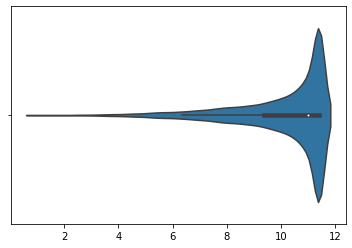

In [88]:
print("Violin plot for idf values\n")
sns.violinplot(tf.idf_)
plt.show()

### Observation:

 - Quartile 1: IDF values ranges from 0 to 9.3.
 - Quartile 2: IDF values ranges from 9.4 to 10.99.
 - Quartile 3: IDF values ranges from 11 to 11.39.
 - Quartile 4" IDF values ranges from 11.39 to 11.399

In [89]:
sort_idf = sorted(tf.idf_)

print("Mean of idf values:", np.mean(sort_idf))
print("Median of idf values:", np.median(sort_idf))
print("Maximum of idf values:", max(sort_idf))
print("Minimum of idf values:", min(sort_idf))

Mean of idf values: 10.06835202916157
Median of idf values: 10.99194094487724
Maximum of idf values: 11.397406052985405
Minimum of idf values: 1.0075034040634312


In [90]:
# Get the IQR (Inter Quartile Range)

q1 = np.percentile(sort_idf, 25)
q3 = np.percentile(sort_idf, 75)

print("Quartile 1 (Q1):", np.percentile(sort_idf, 25))
print("Quartile 2 (Q2):", np.percentile(sort_idf, 50))
print("Quartile 3 (Q3):", np.percentile(sort_idf, 75))
print("Quartile 4 (Q4):", np.percentile(sort_idf, 100))

print("\nInter Quartile Range (Q3 - Q1):\n")
(np.percentile(sort_idf, 75) - np.percentile(sort_idf, 25))

Quartile 1 (Q1): 9.38250303244314
Quartile 2 (Q2): 10.99194094487724
Quartile 3 (Q3): 11.397406052985405
Quartile 4 (Q4): 11.397406052985405

Inter Quartile Range (Q3 - Q1):



2.014903020542265

### Getting list of words whose IDF values falls under IQR i.e between Q1 and Q3

In [0]:
list_words = []

for i in range(len(feat_idf)):
    
    if feat_idf[i][0] > 2 and feat_idf[i][0] < 11:
        words = feat_idf[i][1]
        list_words.append(words)

In [92]:
print("Number of words before taking IQR:", len(feat_idf))
print("Number of words after taking IQR:", len(list_words))

Number of words before taking IQR: 45937
Number of words after taking IQR: 28110


### Tokenize:

##### Input data to layer should be integer. So, using tokenize inbuilt function, we will integer encode the text data.

In [94]:
from keras.preprocessing.text import Tokenizer

t_2 = Tokenizer(num_words = vocab_size)

# Fit train text data
t_2.fit_on_texts(list_words)

# Sequencing train, cv and test data i.e transforming
tr_seq_2 = t.texts_to_sequences(x_tr['essay'])
cv_seq_2 = t.texts_to_sequences(x_cv['essay'])
test_seq_2 = t.texts_to_sequences(x_test['essay'])
print('Done!')

Done!


### Weight Matrix
##### Let's create a weight matrix of train data from the glove vector.
##### Source Link: https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [96]:
# Let's create a weight matrix of train data from the glove vector.
from numpy import zeros

word_count_2 = min(vocab_size, len(t_2.word_index) + 1)

emb_matrix_2 = zeros((word_count_2, emb_dim))
for word, i in t_2.word_index.items():
	emb_vec_2 = glove_words.get(word)
	if emb_vec_2 is not None:
		emb_matrix_2[i] = emb_vec_2
        
print("Number for unique words in train data:", len(t_2.word_index) + 1)
print("Shape of train weight matrix:", emb_matrix_2.shape)

Number for unique words in train data: 28111
Shape of train weight matrix: (28111, 300)


### Padding document

##### Padding document is to have the same input length of each document.

In [98]:
from keras.preprocessing.sequence import pad_sequences

pad_tr_2 = pad_sequences(tr_seq_2, maxlen = seq_len, padding = 'post', truncating = 'post') 
pad_cv_2 = pad_sequences(cv_seq_2, maxlen = seq_len, padding = 'post', truncating = 'post') 
pad_test_2 = pad_sequences(test_seq_2, maxlen = seq_len, padding = 'post', truncating = 'post') 

print("Shape of pad_tr:", pad_tr_2.shape)
print("Shape of pad_cv:", pad_cv_2.shape)
print("Shape of pad_test:", pad_test_2.shape)

Shape of pad_tr: (65548, 500)
Shape of pad_cv: (21850, 500)
Shape of pad_test: (21850, 500)


### Embedding layer for text data

In [0]:
from keras.layers import Embedding, Dense, Flatten, Input, LSTM, Dropout, BatchNormalization, concatenate


input_size_2 = min(vocab_size, len(t_2.word_index) + 1)

# Creating an input layer
input_lay_2 = Input(shape = (seq_len, ), name = "Input_Text_Data")

# Creating an embedding layer
emb_lay_2 = Embedding(input_dim = input_size_2, output_dim = emb_dim,
                         input_length = seq_len, weights = [emb_matrix_2],
                         trainable = False, name = "lstm_text_layer")(input_lay_2)

# Creating LSTM layer
emb_lay_text_2 = LSTM(128, return_sequences = True, dropout = 0.3)(emb_lay_2)

flatten_1_2 = Flatten()(emb_lay_text_2)

### Concatenating all the flattened layers

In [0]:
from keras.layers import concatenate
    
con_lay_2 = concatenate([flatten_1_2, flatten_tea_pre, flatten_sch, flatten_pro_gra, flatten_pro_sub, flatten_pro_sub_1, emb_num])

### Keras model:
 - Activation - 'relu' and 'softmax'.
 - Dropout - 0.3
 - kernel_regularizer - regularizers.l2(0.01)

In [0]:
from keras import regularizers, initializers

# Layer 1
m_2 = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(con_lay_2)
m_2 = Dropout(0.3)(m_2)

# Layer 2
m_2 = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Layer 3
m_2 = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Layer 3
m_2 = Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_2)
m_2 = Dropout(0.3)(m_2)

# Output layer
output_2 = Dense(2, activation = 'softmax', name = 'model_2_output')(m_2)

# Model
model_2 = Model(inputs = [input_lay_2, inp_tea_pre, inp_sch, inp_pro_gra,
                        inp_pro_sub, inp_pro_sub_1, inp_num], outputs = [output_2])

### Network Architecture

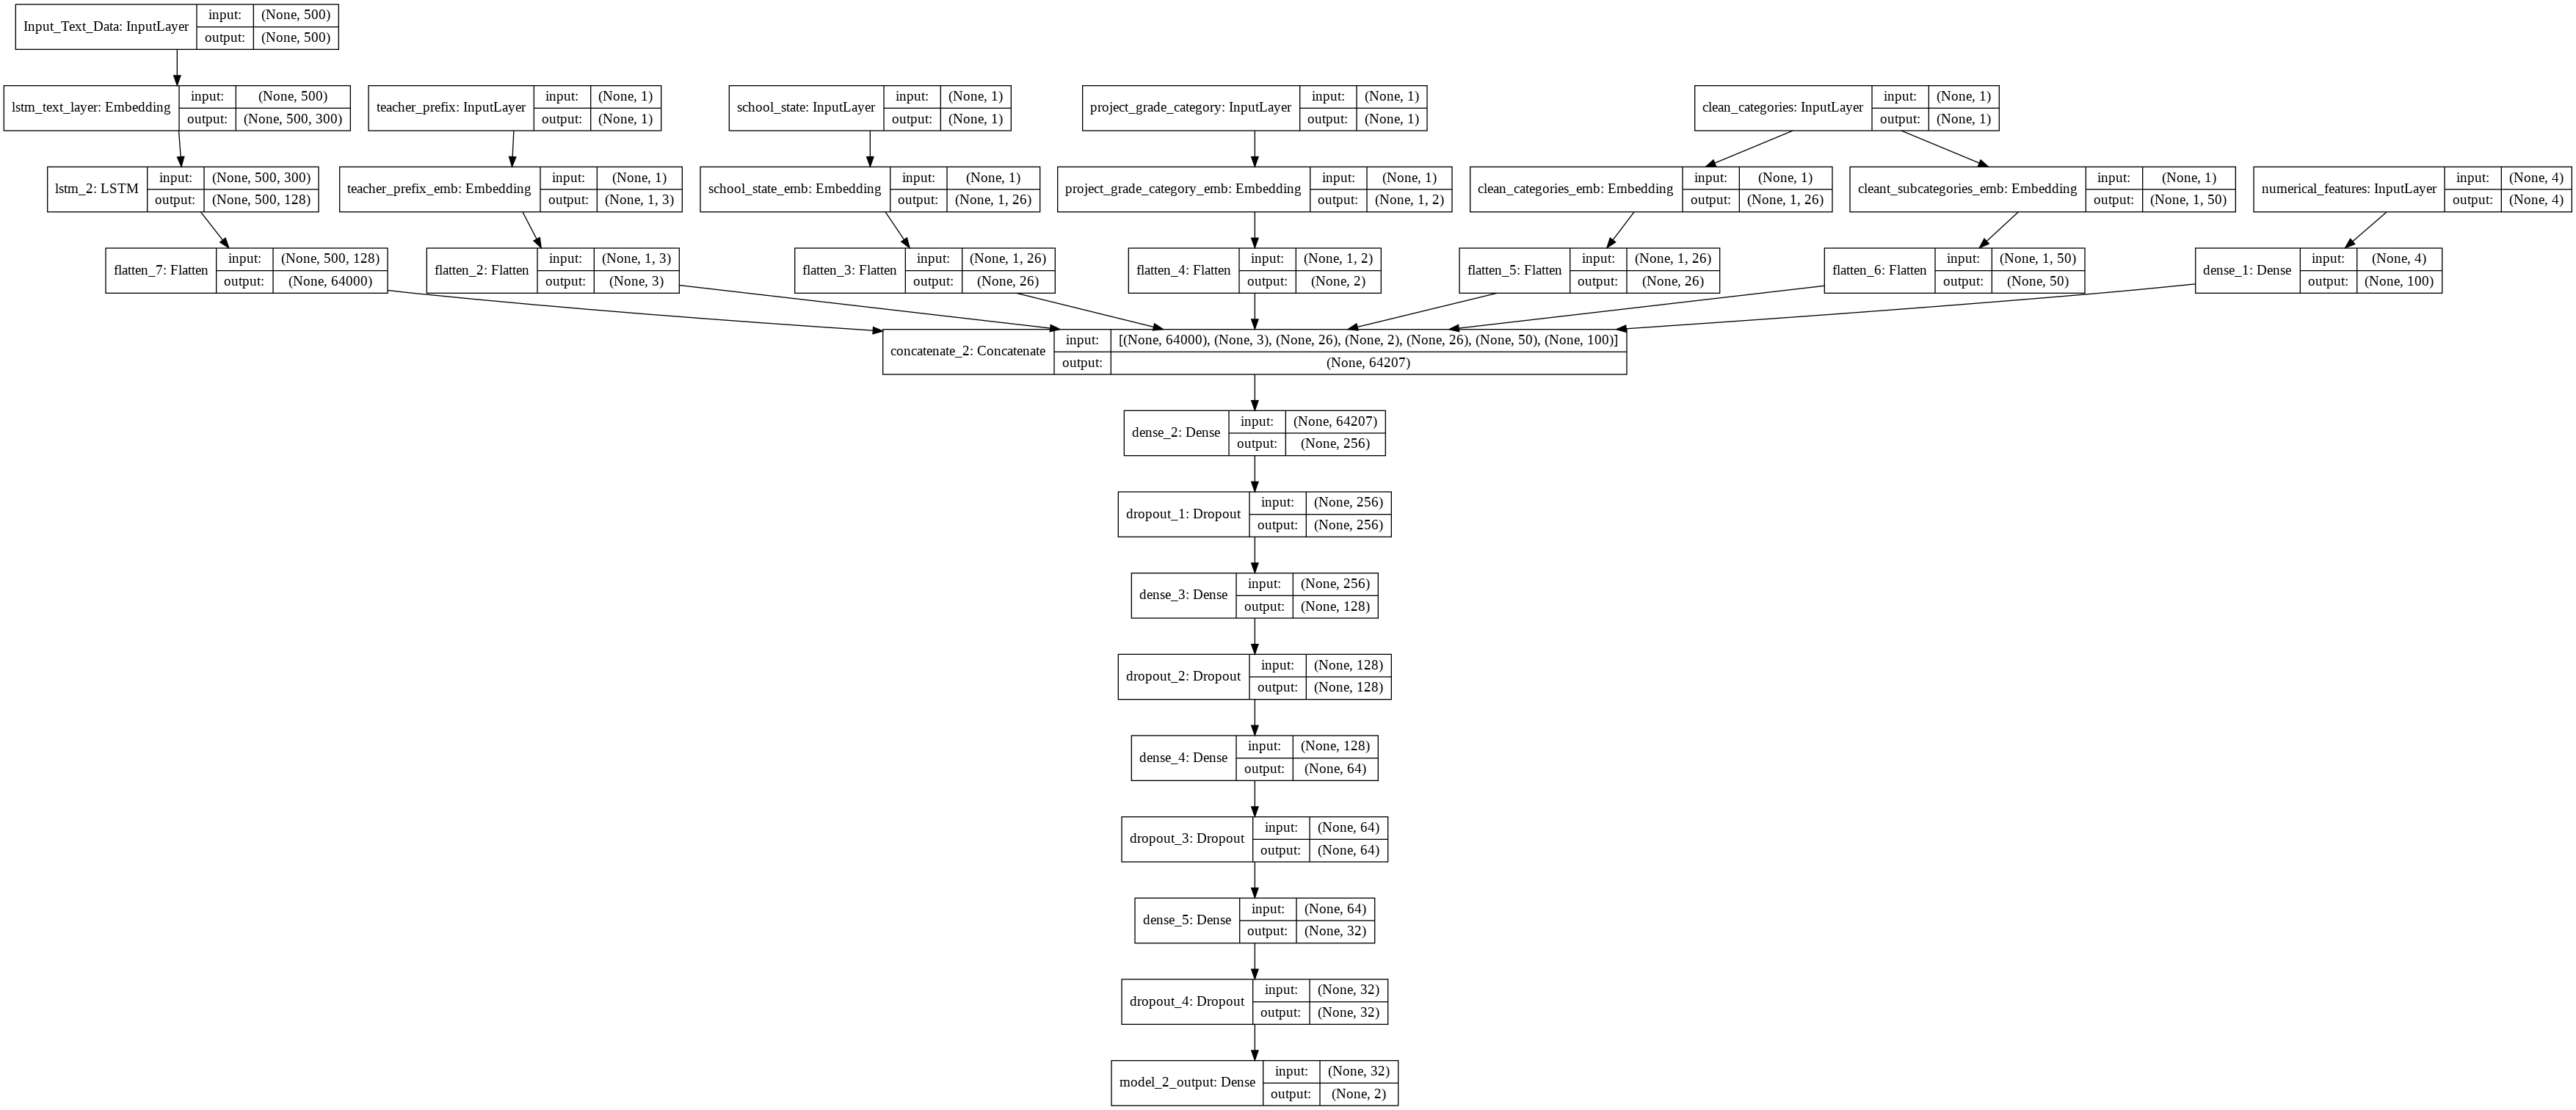

In [106]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_2, show_shapes = True, show_layer_names = True, to_file = 'model_2.png')

Image(retina = True, filename = 'model_2.png')

### Getting all data into list.

In [0]:
# Train data
tr_data_2 = [pad_tr_2, tr_tea_pre_encode, tr_sch_encode, tr_pro_sub_encode, tr_sub_1_encoder, tr_pro_gra_encode, tr_ss]

# CV data
cv_data_2 = [pad_cv_2, cv_tea_pre_encode, cv_sch_encode, cv_pro_sub_encode, cv_sub_1_encoder, cv_pro_gra_encode, cv_ss]

# Test data
test_data_2 = [pad_test_2, test_tea_pre_encode, test_sch_encode, test_pro_sub_encode, test_sub_1_encoder, test_pro_gra_encode, test_ss]

In [0]:
# Chaning type of dependent variable (y) to categorical type
from keras.utils import np_utils

y_tr_data_2 = np_utils.to_categorical(y_tr, 2) 
y_cv_data_2 = np_utils.to_categorical(y_cv, 2)
y_test_data_2 = np_utils.to_categorical(y_test, 2)

### Creating Callback with Checkpoint, EarlyStopping and Tensorboard

##### Source: https://keras.io/callbacks//

In [0]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_2 = ModelCheckpoint("model_2.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_2 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_2 = TensorBoard(log_dir = "drive/My Drive/LSTM on Donors/graph_2",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_2 = [checkpoint_2, earlystop_2, tensorboard_2]

### Compile the data

 - __Optimizer: rmsprop__
 - __Dropout - 0.3__
 - __Loss: categorical_crossentropy__
 - __Metric: AUC-ROC__

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.metrics import roc_auc_score

import tensorflow as tf

def auroc_2(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [114]:
from keras.optimizers import Adam, RMSprop

model_2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [auroc_2])



Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


### Fitting model and callback to visualize model

In [116]:
try:  
  history_2 = model_2.fit(tr_data_2, y_tr_data_2, batch_size = 512,
                        epochs = 10, validation_data = (cv_data_2, y_cv_data_2), verbose = 1,
                        callbacks = callback_2)
except ValueError:
    pass

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 65548 samples, validate on 21850 samples


Epoch 1/10
65548/65548 [==============================] - 104s 2ms/step - loss: 1.8326 - auroc_2: 0.5317 - val_loss: 0.9759 - val_auroc_2: 0.6282

Epoch 00001: val_loss improved from inf to 0.97592, saving model to model_2.h5

Epoch 2/10
65548/65548 [==============================] - 103s 2ms/step - loss: 0.5487 - auroc_2: 0.5816 - val_loss: 0.6401 - val_auroc_2: 0.5223

Epoch 00002: val_loss improved from 0.97592 to 0.64011, saving model to model_2.h5
Epoch 3/10
65548/65548 [==============================] - 100s 2ms/step - loss: 0.4819 - auroc_2: 0.6028 - val_loss: 0.5644 - val_auroc_2: 0.6731

Epoch 00003: val_loss improved from 0.64011 to 0.56438, saving model to model_2.h5
Epoch 4/10
65548/65548 [==============================] - 101s 2ms/step - loss: 0.4716 - auroc_2: 0.6344 - val_loss: 0.5039 - val_auroc_2: 0.6851

Epoch 00004: val_l

### Evaluating test data

21850/21850 [==============================] - 13s 577us/step
Test Loss: 0.5087654665078397
Test ROC-AUC score: 0.7228161813022594 



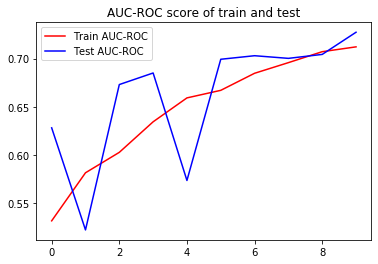

In [119]:
# Evaluating test data
score_2 = model_2.evaluate(test_data_2, y_test_data_2, verbose = 1, batch_size = 512)
print('Test Loss:', score_2[0])
print('Test ROC-AUC score:', score_2[1], '\n')

# Plotting train and test auc roc score
plt.plot(history_2.history['auroc_2'], 'r')
plt.plot(history_2.history['val_auroc_2'], 'b')
plt.title("AUC-ROC score of train and test")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b'})
plt.show()

### Observation:

 - Test loss - 0.509
 - Test AUC-ROC - 0.723

# --------------------------- Model - 3 ---------------------------

In [0]:
from sklearn.model_selection import train_test_split

# Splitting into x and y into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# Splitting train set into tr and cv set
x_tr, x_cv, y_tr, y_cv = train_test_split(x_train, y_train, test_size = 0.25, random_state = 42, stratify = y_train)

In [121]:
print("Shape of x_tr:", x_tr.shape)
print("Shape of x_cv:", x_cv.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_tr:", y_tr.shape)
print("Shape of y_cv:", y_cv.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_tr: (65548, 10)
Shape of x_cv: (21850, 10)
Shape of x_test: (21850, 10)
Shape of y_tr: (65548,)
Shape of y_cv: (21850,)
Shape of y_test: (21850,)


In [0]:
# Train
df_cn_tr = pd.DataFrame()

df_cn_tr['tea_pre'] = tr_tea_pre_encode
df_cn_tr['sch'] = tr_sch_encode
df_cn_tr['pro_sub'] = tr_pro_sub_encode
df_cn_tr['sub_1'] = tr_sub_1_encoder
df_cn_tr['pro_gra'] = tr_pro_gra_encode
df_cn_tr['pri'] = tr_1
df_cn_tr['qua'] = tr_2
df_cn_tr['pro_sum'] = tr_3
df_cn_tr['tea_sum'] = tr_4

# CV
df_cn_cv = pd.DataFrame()

df_cn_cv['tea_pre'] = cv_tea_pre_encode
df_cn_cv['sch'] = cv_sch_encode
df_cn_cv['pro_sub'] = cv_pro_sub_encode
df_cn_cv['sub_1'] = cv_sub_1_encoder
df_cn_cv['pro_gra'] = cv_pro_gra_encode
df_cn_cv['pri'] = cv_1
df_cn_cv['qua'] = cv_2
df_cn_cv['pro_sum'] = cv_3
df_cn_cv['tea_sum'] = cv_4

# Test
df_cn_te = pd.DataFrame()

df_cn_te['tea_pre'] = test_tea_pre_encode
df_cn_te['sch'] = test_sch_encode
df_cn_te['pro_sub'] = test_pro_sub_encode
df_cn_te['sub_1'] = test_sub_1_encoder
df_cn_te['pro_gra'] = test_pro_gra_encode
df_cn_te['pri'] = test_1
df_cn_te['qua'] = test_2
df_cn_te['pro_sum'] = test_3
df_cn_te['tea_sum'] = test_4


In [123]:
tr_exp = np.expand_dims(df_cn_tr, 2)
cv_exp = np.expand_dims(df_cn_cv, 2)
te_exp = np.expand_dims(df_cn_te, 2)

print('-'*22)
print("Shapes in 2 dimension.")
print('-'*22)
print("Train shape:", df_cn_tr.shape)
print("CV shape:", df_cn_cv.shape)
print("Test shape:", df_cn_te.shape, '\n')


print('-'*22)
print("Shapes in 3 dimension.")
print('-'*22)
print("Train shape:", tr_exp.shape)
print("CV shape:", cv_exp.shape)
print("Test shape:", te_exp.shape)

----------------------
Shapes in 2 dimension.
----------------------
Train shape: (65548, 9)
CV shape: (21850, 9)
Test shape: (21850, 9) 

----------------------
Shapes in 3 dimension.
----------------------
Train shape: (65548, 9, 1)
CV shape: (21850, 9, 1)
Test shape: (21850, 9, 1)


### Getting all data into a list

In [0]:
# Concatinating padded data and expanded data.

tr_data_3 = [pad_tr, tr_exp]
cv_data_3 = [pad_cv, cv_exp]
te_data_3 = [pad_test, te_exp]

In [0]:
# Chaning type of dependent variable (y) to categorical type
from keras.utils import np_utils

y_tr_data_3 = np_utils.to_categorical(y_tr, 2) 
y_cv_data_3 = np_utils.to_categorical(y_cv, 2)
y_test_data_3 = np_utils.to_categorical(y_test, 2)

## Convolution 1D

 - Layers - 4
 - Kernel size - 3
 - Activation - 'relu' and 'softmax'
 - Padding - same

In [0]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D, Activation

# Input layer
inp_lay_1 = Input(shape = (9,1), name = "Conv1")

# Block 1
con1 = Conv1D(64, kernel_size = 3, activation = 'relu', name = 'block_1')(inp_lay_1)

# Block 2
con2 = Conv1D(64, 3, activation='relu', padding = 'same', name = 'block_2')(con1)

# Block 3
con3 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'block_3')(con2)

# Block 4
con4 = Conv1D(32, 3, activation='softmax', padding = 'same',  name = 'block_4')(con3)

# Flattening
flat1 = Flatten()(con4)

### Concatinating LSTM output and Conv1D output

In [0]:
from keras.layers import concatenate
    
con_lay_3 = concatenate([flatten_1, flat1])

### Keras model:
 - Activation - 'relu' and 'softmax'.
 - Dropout - 0.3
 - kernel_regularizer - regularizers.l2(0.01)

In [0]:
from keras.models import Model

# Layer 1
m_3 = Dense(256, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(con_lay_3)
m_3 = Dropout(0.3)(m_3)

# Layer 2
m_3 = Dense(128, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Layer 3
m_3 = Dense(64, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Layer 4
m_3 = Dense(32, activation = 'relu', kernel_regularizer = regularizers.l2(0.01))(m_3)
m_3 = Dropout(0.3)(m_3)

# Output layer
output_3 = Dense(2, activation = 'softmax', name= 'model_1_output')(m_3)

# Model
model_3 = Model(inputs = [input_lay, inp_lay_1], outputs = output_3)

### Network Architecture

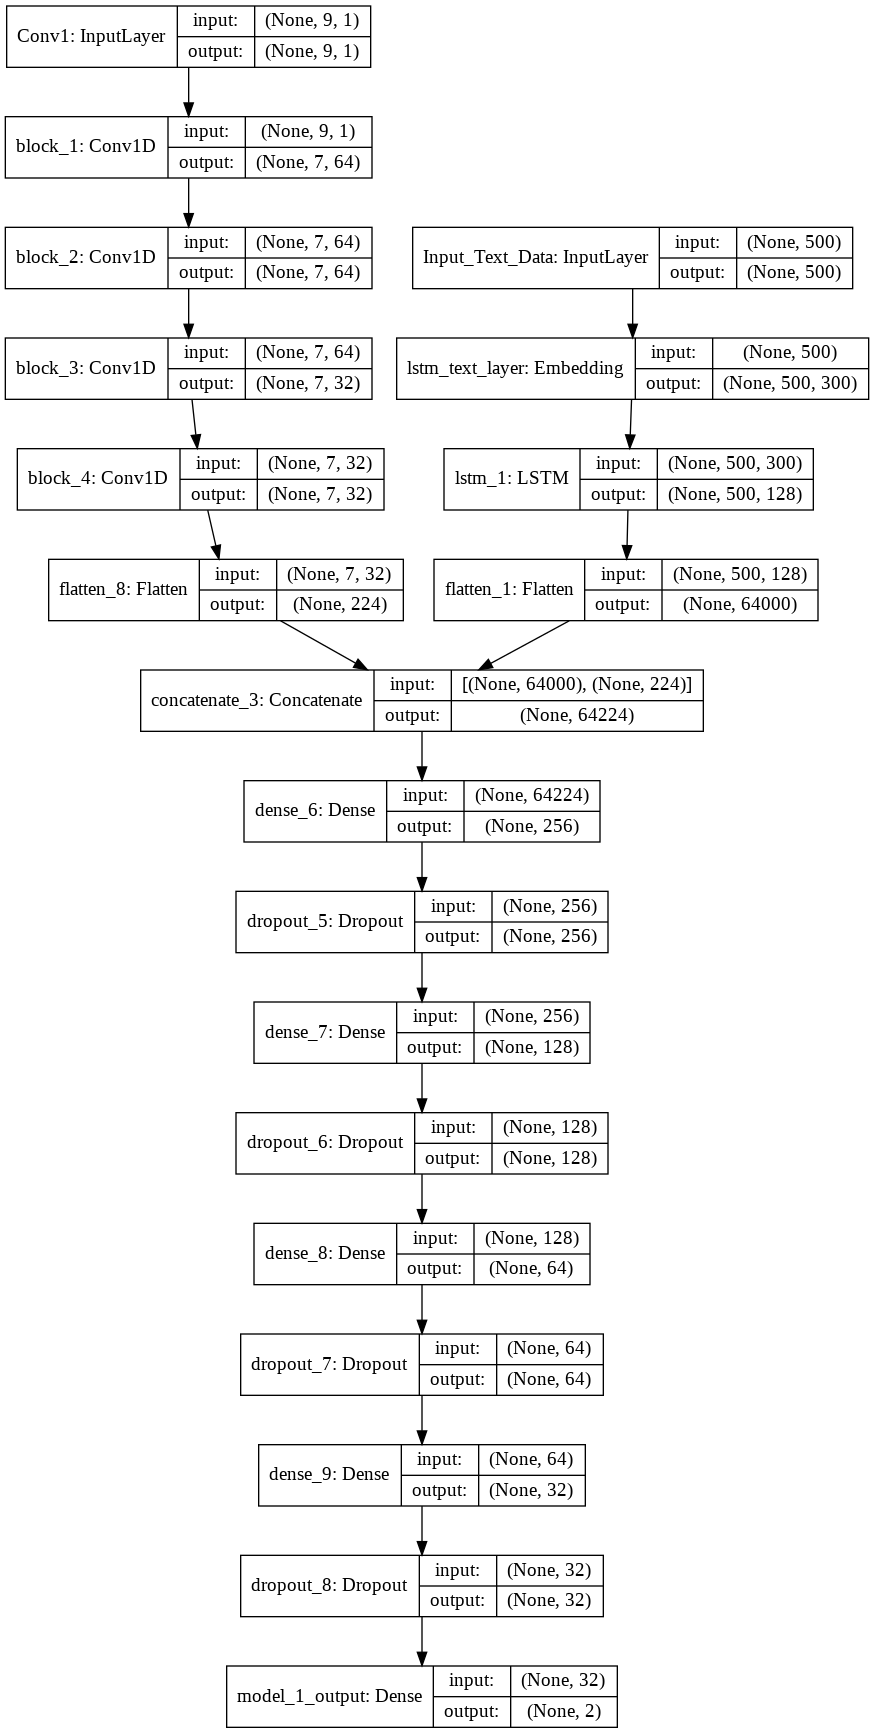

In [131]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb

import pydot_ng as pydot
from keras.utils import plot_model
from IPython.display import Image

plot_model(model_3, show_shapes = True, show_layer_names = True, to_file = 'model_3.png')

Image(retina = True, filename = 'model_3.png')

### Creating Callback with Checkpoint, EarlyStopping and Tensorboard

##### Source: https://keras.io/callbacks/

In [0]:
import keras
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping

# Saves the model after every epoch
checkpoint_3 = ModelCheckpoint("model_3.h5", monitor = "val_loss", mode = "min",
                                save_best_only = True, verbose = 1)

# Stops training when a monitored quantity has stopped improving.
earlystop_3 = EarlyStopping(monitor = 'val_loss', mode = "min", patience = 5,
                            verbose = 1, restore_best_weights = True)

# TensorBoard is a visualization tool provided with TensorFlow.
tensorboard_3 = TensorBoard(log_dir = "drive/My Drive/LSTM on Donors/graph_3",
                         histogram_freq = 0, batch_size = 500, write_graph = True,
                         write_grads = False, write_images = False, embeddings_freq = 0,
                         embeddings_layer_names = None, embeddings_metadata = None,
                         embeddings_data = None, update_freq = 'epoch')

# Creating Callback
callback_3 = [checkpoint_3, earlystop_3, tensorboard_3]


### Compile the data

 - __Optimizer: rmsprop__
 - __Dropout - 0.3__
 - __Loss: categorical_crossentropy__
 - __Metric: AUC-ROC__

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from sklearn.metrics import roc_auc_score

import tensorflow as tf

def auroc_3(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [0]:
from keras.optimizers import Adam, RMSprop

  model_3.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = [auroc_3])


### Fitting model and callback to visualize model

In [137]:
 try: 
  history_3 = model_3.fit(tr_data_3, y_tr_data_3, batch_size = 512,
                        epochs = 10, validation_data = (cv_data_3, y_cv_data_3), verbose = 1,
                        callbacks = callback_3)

except ValueError:
  pass

Train on 65548 samples, validate on 21850 samples
Epoch 1/10
65548/65548 [==============================] - 106s 2ms/step - loss: 1.8402 - auroc_3: 0.5764 - val_loss: 0.8548 - val_auroc_3: 0.6564

Epoch 00001: val_loss improved from inf to 0.85480, saving model to model_3.h5
Epoch 2/10
65548/65548 [==============================] - 102s 2ms/step - loss: 0.5437 - auroc_3: 0.6553 - val_loss: 0.5376 - val_auroc_3: 0.7104

Epoch 00002: val_loss improved from 0.85480 to 0.53764, saving model to model_3.h5
Epoch 3/10
65548/65548 [==============================] - 101s 2ms/step - loss: 0.4700 - auroc_3: 0.6855 - val_loss: 0.5189 - val_auroc_3: 0.7147

Epoch 00003: val_loss improved from 0.53764 to 0.51892, saving model to model_3.h5
Epoch 4/10
65548/65548 [==============================] - 100s 2ms/step - loss: 0.4590 - auroc_3: 0.6999 - val_loss: 0.5266 - val_auroc_3: 0.7222

Epoch 00004: val_loss did not improve from 0.51892
Epoch 5/10
65548/65548 [==============================] - 101s 2ms

### Evaluating test data

21850/21850 [==============================] - 12s 570us/step
Test Loss: 0.5309653811323833
Test ROC-AUC score: 0.7371661692995498 



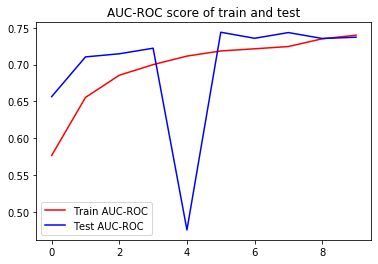

In [138]:
# Evaluating test data
score_3 = model_3.evaluate(te_data_3, y_test_data_3, verbose = 1, batch_size = 512)
print('Test Loss:', score_3[0])
print('Test ROC-AUC score:', score_3[1], '\n')

# Plotting train and test auc roc score
plt.plot(history_3.history['auroc_3'], 'r')
plt.plot(history_3.history['val_auroc_3'], 'b')
plt.title("AUC-ROC score of train and test")
plt.legend({'Train AUC-ROC': 'r', 'Test AUC-ROC':'b'})
plt.show()

### Observation:

 - Test loss - 0.53
 - Test AUC-ROC - 0.737

# Conclusion: Pretty Table

In [1]:
from prettytable import PrettyTable

a = PrettyTable()

a.field_names = ['S.No', 'Model', 'Optimizer', 'Dropout', 'Test Loss', 'Test AUC-ROC']

a.add_row([1, 'Model- 1', 'rmsprop', 0.3, 0.47, 0.75])
a.add_row([2, 'Model- 2', 'rmsprop', 0.3, 0.51, 0.72])
a.add_row([3, 'Model- 3', 'rmsprop', 0.3, 0.53, 0.74])

print(a.get_string(title = "LSTM on Donors Result"))

+------+----------+-----------+---------+-----------+--------------+
| S.No |  Model   | Optimizer | Dropout | Test Loss | Test AUC-ROC |
+------+----------+-----------+---------+-----------+--------------+
|  1   | Model- 1 |  rmsprop  |   0.3   |    0.47   |     0.75     |
|  2   | Model- 2 |  rmsprop  |   0.3   |    0.51   |     0.72     |
|  3   | Model- 3 |  rmsprop  |   0.3   |    0.53   |     0.74     |
+------+----------+-----------+---------+-----------+--------------+
